## Binary classification: imdb reviews

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

2024-05-06 08:51:23.110173: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-06 08:51:23.141437: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15463432636481399200
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5859835904
locality {
  bus_id: 1
  links {
  }
}
incarnation: 18391720562567559367
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 4060, pci bus id: 0000:01:00.0, compute capability: 8.9"
xla_global_id: 416903419
]


2024-05-06 08:51:32.570675: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-06 08:51:32.574552: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-06 08:51:32.574667: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [3]:
word_index = imdb.get_word_index()
reverse_word_index = {val: k for k, val in word_index.items()}
decoded_review = " ".join([reverse_word_index.get(x-3, '?') for x in train_data[0]])
decoded_review

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [4]:
import numpy as np 
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)
X_train.shape

(25000, 10000)

In [5]:
y_train = np.asarray(train_labels).astype(np.float32)
y_test = np.asarray(test_labels).astype(np.float32)
y_train.shape

(25000,)

In [6]:
from tensorflow import keras 
from tensorflow.keras import layers 

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

2024-05-06 08:51:47.842263: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-06 08:51:47.842590: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-06 08:51:47.842788: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Crossentropy is a quantity from information theory that measures the distance between probability distributions: in this case, between the ground truth labels distribution and the predictions distribution

In [7]:
X_val = X_train[:10000]
partial_X_train = X_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [8]:
history = model.fit(partial_X_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(X_val, y_val))

Epoch 1/20


I0000 00:00:1714985516.942568     103 service.cc:145] XLA service 0x7a1a380043b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1714985516.942600     103 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 4060, Compute Capability 8.9
2024-05-06 08:51:56.956776: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-06 08:51:57.019987: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8906


16/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6249 - loss: 0.6389

I0000 00:00:1714985517.576558     103 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.6850 - loss: 0.5916 - val_accuracy: 0.8665 - val_loss: 0.3848
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8938 - loss: 0.3240 - val_accuracy: 0.8742 - val_loss: 0.3198
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9224 - loss: 0.2377 - val_accuracy: 0.8904 - val_loss: 0.2815
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9386 - loss: 0.1900 - val_accuracy: 0.8868 - val_loss: 0.2812
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9538 - loss: 0.1533 - val_accuracy: 0.8880 - val_loss: 0.2798
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9648 - loss: 0.1245 - val_accuracy: 0.8838 - val_loss: 0.2915
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9696 - loss: 0.1067 - val_accuracy: 0.8844 - val_loss: 0.3087
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9751 - loss: 0.0902 - val_accuracy: 0.8819 - val_loss: 0.3154
E

In [16]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

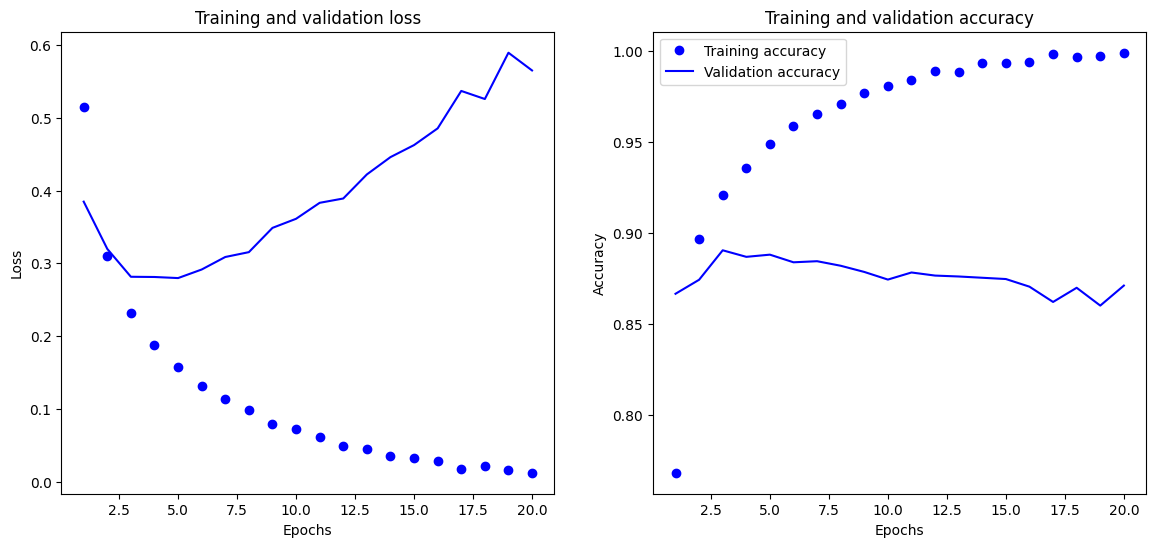

In [9]:
import matplotlib.pyplot as plt 
def plot_history(history):
    history_dict = history.history
    fig, axs = plt.subplots(1,2, figsize=(14,6))
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    epochs = range(1, len(loss_values)+1)
    axs[0].plot(epochs, loss_values, 'bo', label="Training loss")
    axs[0].plot(epochs, val_loss_values, 'b', label="Validation loss")
    axs[0].set_title("Training and validation loss")
    axs[0].set_xlabel("Epochs")
    axs[0].set_ylabel("Loss")

    axs[1].plot(epochs, history_dict['accuracy'], 'bo', label="Training accuracy")
    axs[1].plot(epochs, history_dict['val_accuracy'], 'b', label='Validation accuracy')
    axs[1].set_ylabel("Accuracy")
    axs[1].set_xlabel("Epochs")
    axs[1].set_title("Training and validation accuracy")
    plt.legend()
    plt.show()
plot_history(history)

## Multiclass classification: classifying newswires

In [33]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
print("Size of training set, test set: ", len(train_data), ', ', len(test_data))

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Size of training set, test set:  8982 ,  2246


In [34]:
word_index = reuters.get_word_index()
reverse_word_index = {val: k for k, val in word_index.items()}
decoded_newswire = " ".join([reverse_word_index.get(x-3, '?') for x in train_data[0]])
decoded_newswire

550378/550378 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [35]:
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

In [36]:
from tensorflow.keras.utils import to_categorical  # one hot encoding
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)
print(f"train_labels[0]: {train_labels[0]}, y_train[0]: {y_train[0]}")

train_labels[0]: 3, y_train[0]: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [45]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=1e-4),
              loss="categorical_crossentropy",
              metrics=['accuracy'])


In [46]:
X_val = X_train[:1000]
partial_X_train = X_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

Epoch 1/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8983 - loss: 0.4804 - val_accuracy: 0.8150 - val_loss: 0.8788
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9026 - loss: 0.4556 - val_accuracy: 0.8200 - val_loss: 0.8695
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9120 - loss: 0.4125 - val_accuracy: 0.8210 - val_loss: 0.8627
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9214 - loss: 0.3798 - val_accuracy: 0.8190 - val_loss: 0.8634
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9179 - loss: 0.3837 - val_accuracy: 0.8240 - val_loss: 0.8587
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9285 - loss: 0.3559 - val_accuracy: 0.8270 - val_loss: 0.8607
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9313 - loss: 0.3234 - val_accuracy: 0.8330 - val_loss: 0.8521
Epoch 8/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9355 - loss: 0.2955 - val_accuracy: 0.

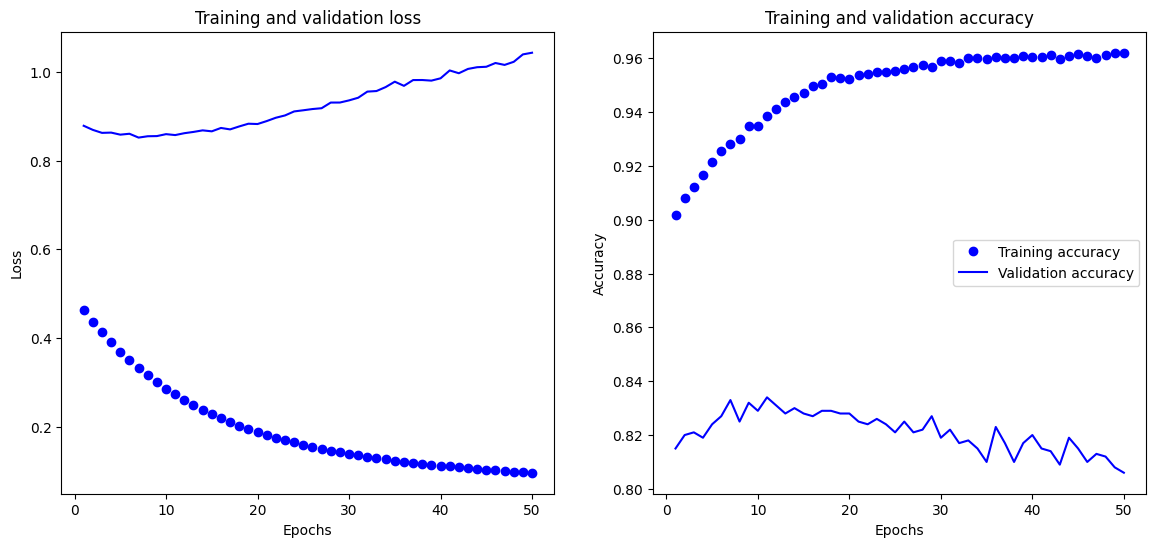

In [48]:
history = model.fit(partial_X_train, 
                    partial_y_train,
                    epochs=50,
                    batch_size=64,
                    validation_data=(X_val, y_val))
plot_history(history)

In [39]:
values, counts = np.unique(train_labels, return_counts=True)
print("Random classifier would obtain: ", max(counts) / sum(counts))

Random classifier would obtain:  0.3517034068136273


<Axes: ylabel='Count'>

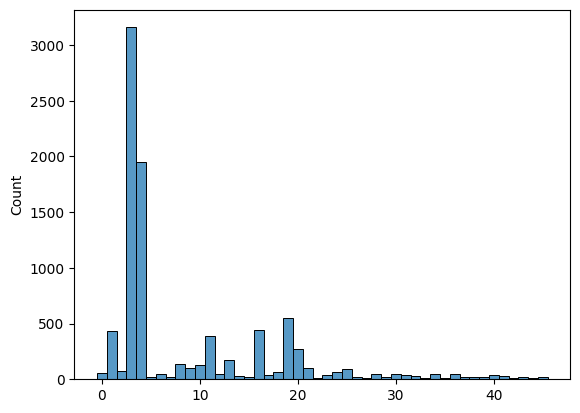

In [45]:
import pandas as pd
import seaborn as sns
test_df = pd.Series(train_labels).astype("category")
sns.histplot(test_df)

## Regression: the Boston housing price dataset

In [10]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()
print("Size of training set, test set: ", len(train_data), ', ', len(test_data))

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Size of training set, test set:  404 ,  102


In [13]:
mean = train_data.mean(axis=0)
train_data -= mean 
std = train_data.std(axis=0)
train_data /= std 
test_data = (test_data - mean) / std 

In [14]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model 

In [18]:
k = 4
num_val_samples = len(train_data) // k 
num_epochs = 500
all_mae_histories = list()
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i+1)*num_val_samples]
    val_targets = train_labels[i * num_val_samples: (i+1)*num_val_samples]
    partial_train_data = np.concatenate((train_data[:i*num_val_samples], train_data[(i+1)*num_val_samples:]), axis=0)
    partial_train_targets = np.concatenate((train_labels[:i*num_val_samples], train_labels[(i+1)*num_val_samples:]), axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=16, verbose=0, validation_data=(val_data, val_targets))
    all_mae_histories.append(history.history["val_mae"])

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [22]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

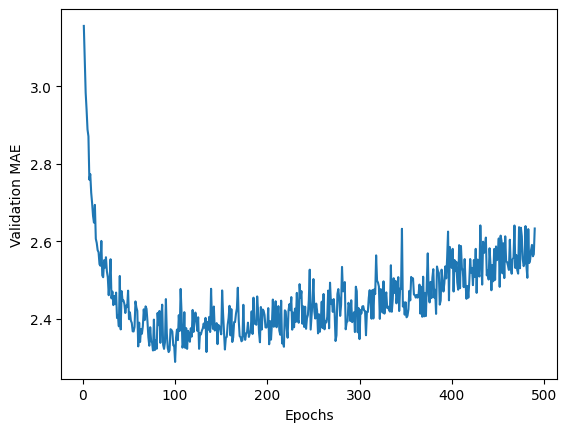

In [24]:
truncated = average_mae_history[10:]
plt.plot(range(1, len(truncated)+1), truncated)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

In [27]:
model = build_model()
model.fit(train_data, train_labels, epochs=140, batch_size=16)
test_mse_score, test_mae_score = model.evaluate(test_data, test_labels)
test_mae_score

Epoch 1/140
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 502.9947 - mae: 20.4008 
Epoch 2/140
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step - loss: 302.8250 - mae: 15.1474
Epoch 3/140
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step - loss: 131.9395 - mae: 9.3209
Epoch 4/140
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step - loss: 53.2055 - mae: 5.1673
Epoch 5/140
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - loss: 37.7364 - mae: 4.2414
Epoch 6/140
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - loss: 23.2221 - mae: 3.4517
Epoch 7/140
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - loss: 30.1395 - mae: 3.5842
Epoch 8/140
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step - loss: 21.7613 - mae: 3.1643
Epoch 9/140
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - loss: 18.1697 - mae: 3.0363
Epoch 10/140
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step - loss: 17.2205 - mae: 2.7995
Epoch 11/140
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - loss: 13.7408 - mae: 2.6272
Epoch 12/140
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step - loss: 11.9908 - mae: 2.51

2.492321014404297

In [31]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=50, criterion='squared_error')
regressor.fit(train_data, train_labels)

RandomForestRegressor(n_estimators=50)

In [32]:
from sklearn.metrics import mean_absolute_error
preds = regressor.predict(test_data)
mean_absolute_error(preds, test_labels)

2.4623725490196087